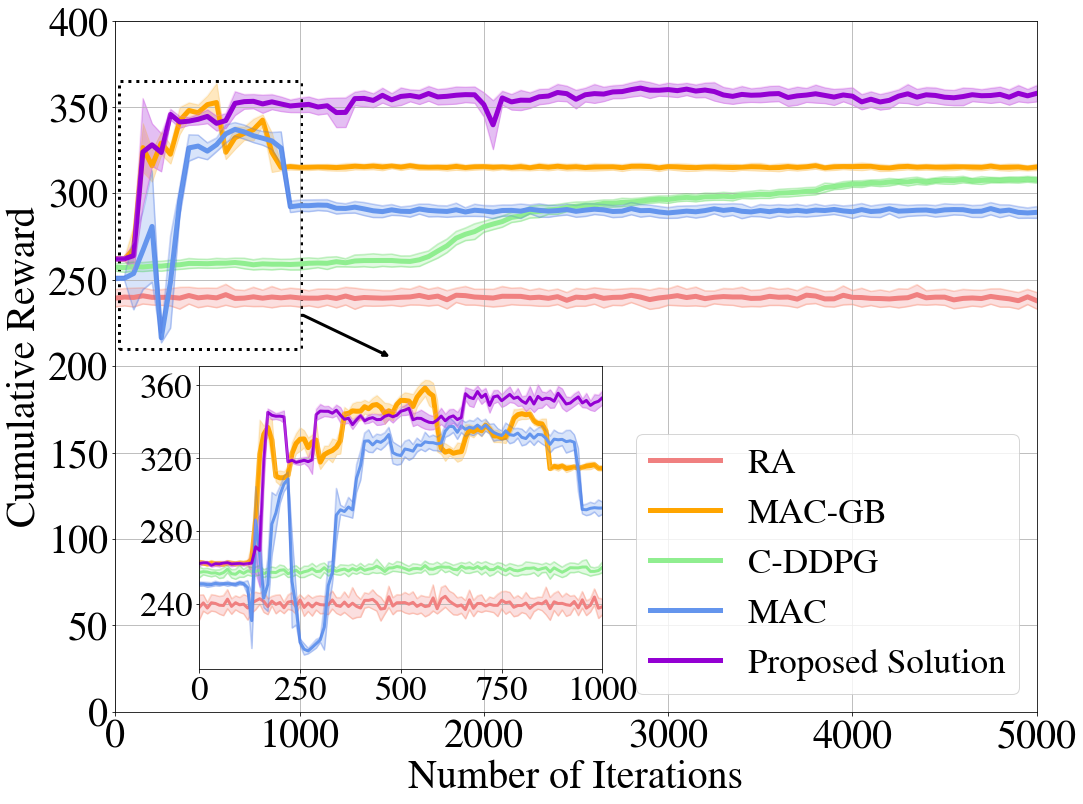

In [2]:
%matplotlib inline
from File_Name import project_dir, data
from matplotlib.pyplot import MultipleLocator
import matplotlib.patches as patches
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import font_manager

def draw_every_results(cr_csv, ranges, max_num, y_min):
    font_size = 40
    colors = ['lightcoral', 'coral', 'orange', 'wheat', 'lightgreen', 'limegreen', 'cornflowerblue', 'royalblue',  'darkviolet', 'violet']
    df = pd.read_csv(cr_csv, names=["Epoch index", "ra", "c-ddpg", "mac", "mac-gba", "mdr-gba"], header=0)
    epoch_index = df["Epoch index"].values.tolist()
    ra_rewards = df["ra"].values.tolist()
    c_ddpg_rewards = df["c-ddpg"].values.tolist()
    iac_ga_rewards = df["mac"].values.tolist()
    madr_ga_rewards = df["mac-gba"].values.tolist()
    hdr_madrl_rewards = df["mdr-gba"].values.tolist()
    plt.figure(figsize=(16, 12))
    plt.rcParams['font.sans-serif'] = ['Nimbus Roman']
    draw_one_result(epoch_index, ra_rewards, ranges, max_num, colors[0:2], line_label='RA')
    # draw_one_result(epoch_index, c_ddpg_rewards, ranges, max_num, colors[2:4], line_label='C-DDPG')
    draw_one_result(epoch_index, c_ddpg_rewards, ranges, max_num, colors[4:6], line_label='C-DDPG')
    draw_one_result(epoch_index, iac_ga_rewards, ranges, max_num, colors[6:8], line_label='MAC')
    draw_one_result(epoch_index, hdr_madrl_rewards, ranges, max_num, colors[8:], line_label='MDR')
    
    plt.xlim(xmin=0, xmax=max_num-50)
    plt.ylim(ymin=y_min, ymax=400)
    plt.xlabel("Number of Iterations", fontsize=font_size)  # 横坐标名字
    plt.ylabel("Cumulative Reward", fontsize=font_size)  # 纵坐标名字
    plt.tick_params(labelsize=font_size)        # 设置坐标轴上刻度的字体大小
    plt.legend(loc=4, fontsize =35)     # 显示图例，loc=0表示图例会根据图片情况自动摆放
    plt.grid()
    plt.savefig('cr_results.png', dpi=100)
    plt.show

def draw_small_every_results(cr_csv, ranges, max_num):
    font_size = 65
    colors = ['lightcoral', 'coral', 'orange', 'wheat', 'lightgreen', 'limegreen', 'cornflowerblue', 'royalblue',  'darkviolet', 'violet']
    df = pd.read_csv(cr_csv, names=["Epoch index", "ra", "c-ddpg", "mac", "mac-gba", "mdr-gba"], header=0)
    epoch_index = df["Epoch index"].values.tolist()
    ra_rewards = df["ra"].values.tolist()
    c_ddpg_rewards = df["c-ddpg"].values.tolist()
    iac_ga_rewards = df["mac"].values.tolist()
    madr_ga_rewards = df["mac-gba"].values.tolist()
    hdr_madrl_rewards = df["mdr-gba"].values.tolist()
    plt.figure(figsize=(16, 12))
    plt.rcParams['font.sans-serif'] = ['Nimbus Roman']
    draw_one_result(epoch_index, ra_rewards, ranges, max_num, colors[0:2], line_label='RA')
    # draw_one_result(epoch_index, c_ddpg_rewards, ranges, max_num, colors[2:4], line_label='C-DDPG')
    draw_one_result(epoch_index, c_ddpg_rewards, ranges, max_num, colors[4:6], line_label='C-DDPG')
    draw_one_result(epoch_index, iac_ga_rewards, ranges, max_num, colors[6:8], line_label='MAC')
    draw_one_result(epoch_index, hdr_madrl_rewards, ranges, max_num, colors[8:], line_label='MDR')

    plt.xlim(xmin=0, xmax=max_num-50)
    ax = plt.gca()
    ax.yaxis.set_major_locator(MultipleLocator(40))
    # plt.ylim(ymin=y_min, ymax=400)
    # plt.xlabel("Number of Iterations", fontsize=font_size)  # 横坐标名字
    # plt.ylabel("Cumulative Reward", fontsize=font_size)  # 纵坐标名字
    plt.tick_params(labelsize=font_size)        # 设置坐标轴上刻度的字体大小
    # plt.legend(loc=4, fontsize = font_size)     # 显示图例，loc=0表示图例会根据图片情况自动摆放
    plt.grid()
    plt.savefig('cr_results_small.png', dpi=100)
    plt.show

def draw_one_result(axe, epoch_index, rewards, ranges, max_num, colors, line_label, linewidth=5.0):
    mean_minus_std, mean_results, mean_plus_std = get_mean_and_standard_deviation_result(rewards, ranges, max_num)
    x_vals = list(range(len(mean_results)))
    nex_x_vals = [x * ranges for x in x_vals]
    axe.plot(nex_x_vals, mean_results, color=colors[0], label=line_label, linewidth=linewidth)
    axe.plot(nex_x_vals, mean_plus_std, color=colors[1], alpha=0.25)
    axe.plot(nex_x_vals, mean_minus_std, color=colors[1], alpha=0.25)
    axe.fill_between(nex_x_vals, y1=mean_minus_std, y2=mean_plus_std, alpha=0.25, color=colors[0])


def get_mean_and_standard_deviation_result(result, ranges, max_num):
    """From a list of lists of agent results it extracts the mean results and the mean results plus or minus
        some multiple of the standard deviation"""
    mean_results = []
    mean_minus_std = []
    mean_plus_std = []
    index = 0
    for i in range(int(max_num / ranges) - 1):
        result_at_a_range = result[index: index + ranges]
        index += ranges
        mean_result = np.mean(result_at_a_range)
        std_result = np.std(result_at_a_range)
        mean_results.append(mean_result)
        mean_minus_std.append(mean_result - std_result)
        mean_plus_std.append(mean_result + std_result)
    
    result_at_a_range = result[-ranges:]
    mean_result = np.mean(result_at_a_range)
    std_result = np.std(result_at_a_range)
    mean_results.append(mean_result)
    mean_minus_std.append(mean_result - std_result)
    mean_plus_std.append(mean_result + std_result)
    return mean_minus_std, mean_results, mean_plus_std

def draw_add_results(cr_csv, ranges, max_num, y_min, small_ranges, small_max_num):
    fig = plt.figure(figsize=(16, 12))
    left, bottom, width, height = 0.1,0.1,0.8,0.8
    plt.axes([left,bottom,width,height])
    
    font_size = 40
    colors = ['lightcoral', 'coral', 'orange', 'wheat', 'lightgreen', 'limegreen', 'cornflowerblue', 'royalblue',  'darkviolet', 'violet']
    df = pd.read_csv(cr_csv, names=["Epoch index", "ra", "c-ddpg", "mac", "mac-gba", "mdr-gba"], header=0)
    epoch_index = df["Epoch index"].values.tolist()
    ra_rewards = df["ra"].values.tolist()
    c_ddpg_rewards = df["c-ddpg"].values.tolist()
    iac_ga_rewards = df["mac"].values.tolist()
    madr_ga_rewards = df["mac-gba"].values.tolist()
    hdr_madrl_rewards = df["mdr-gba"].values.tolist()

    plt.rcParams['font.sans-serif'] = ['Nimbus Roman']
    draw_one_result(plt, epoch_index, ra_rewards, ranges, max_num, colors[0:2], line_label='RA')
    draw_one_result(plt, epoch_index, madr_ga_rewards, ranges, max_num, colors[2:4], line_label='MAC-GB')
    draw_one_result(plt, epoch_index, c_ddpg_rewards, ranges, max_num, colors[4:6], line_label='C-DDPG')
    draw_one_result(plt, epoch_index, iac_ga_rewards, ranges, max_num, colors[6:8], line_label='MAC')
    draw_one_result(plt, epoch_index, hdr_madrl_rewards, ranges, max_num, colors[8:], line_label='Proposed Solution')
    
    plt.xlim(xmin=0, xmax=max_num-50)
    plt.ylim(ymin=y_min, ymax=400)
    plt.xlabel("Number of Iterations", fontsize=font_size)  # 横坐标名字
    plt.ylabel("Cumulative Reward", fontsize=font_size)  # 纵坐标名字
    plt.tick_params(labelsize=font_size)        # 设置坐标轴上刻度的字体大小
    plt.legend(loc=4, fontsize =35)     # 显示图例，loc=0表示图例会根据图片情况自动摆放
    plt.grid()

    rect=patches.Rectangle((20, 210), 990, 155, linewidth=3, edgecolor='black', facecolor='none', linestyle='dotted')
    plt.gca().add_patch(rect)
    plt.annotate('',xy=(1500, 205),xytext=(1010,230),arrowprops=dict(arrowstyle="->",connectionstyle="arc3", lw=3))

    # plt.arrow(1010, 230, 490, -20, width=3, shape="full",fc='black',ec='black',alpha=0.9, overhang=1, length_includes_head=True, linewidth=3)

    left, bottom, width, height = 0.173,0.15,0.35,0.35
    ax1 = fig.add_axes([left,bottom,width,height])

    font_size = 35
    colors = ['lightcoral', 'coral', 'orange', 'wheat', 'lightgreen', 'limegreen', 'cornflowerblue', 'royalblue',  'darkviolet', 'violet']
    df = pd.read_csv(cr_csv, names=["Epoch index", "ra", "c-ddpg", "mac", "mac-gba", "mdr-gba"], header=0)
    epoch_index = df["Epoch index"].values.tolist()
    ra_rewards = df["ra"].values.tolist()
    c_ddpg_rewards = df["c-ddpg"].values.tolist()
    iac_ga_rewards = df["mac"].values.tolist()
    madr_ga_rewards = df["mac-gba"].values.tolist()
    hdr_madrl_rewards = df["mdr-gba"].values.tolist()
    # plt.figure(figsize=(16, 12))
    # plt.rcParams['font.sans-serif'] = ['Nimbus Roman']
    draw_one_result(ax1, epoch_index, ra_rewards, small_ranges, small_max_num, colors[0:2], line_label='RA', linewidth=3.0)
    draw_one_result(ax1, epoch_index, madr_ga_rewards, small_ranges, small_max_num, colors[2:4], line_label='MAC-GB')
    draw_one_result(ax1, epoch_index, c_ddpg_rewards, small_ranges, small_max_num, colors[4:6], line_label='C-DDPG', linewidth=3.0)
    draw_one_result(ax1, epoch_index, iac_ga_rewards, small_ranges, small_max_num, colors[6:8], line_label='MAC', linewidth=3.0)
    draw_one_result(ax1, epoch_index, hdr_madrl_rewards, small_ranges, small_max_num, colors[8:], line_label='Proposed Solution', linewidth=3.0)
    ax1.tick_params(labelsize=font_size)  
    ax1.set_xlim(xmin=0, xmax=small_max_num-50)
    # ax1.set_ylim(ymin=200, ymax=400)
    ax1.xaxis.set_major_locator(MultipleLocator(250))
    ax1.yaxis.set_major_locator(MultipleLocator(40))
    ax1.grid()
    plt.savefig("Fig-4.pdf", bbox_inches='tight')
    plt.show()

if __name__ == '__main__':

    
    cr_csv = "/home/neardws/Hierarchical-Reinforcement-Learning/Results/CR_result.csv"
    # draw_every_results(cr_csv, 50, 5050, 0)
    # draw_small_every_results(cr_csv, 10, 1050)
    draw_add_results(cr_csv, 50, 5050, 0, 10, 1050)
    # draw_Results(csv_head, csv_tail, 100, 5000, ['green', 'lightgreen'])
    # draw_all_Results(ra_csv, ddpg_csv, iddpg_csv, hmaimd_head, hmaimd_tail, 100, 5000)